<a href="https://colab.research.google.com/github/Richardjmorton/colab/blob/master/mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
mnist = tf.keras.datasets.mnist


In [13]:
(x_train, ytrain), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.
x_test = x_test/255.

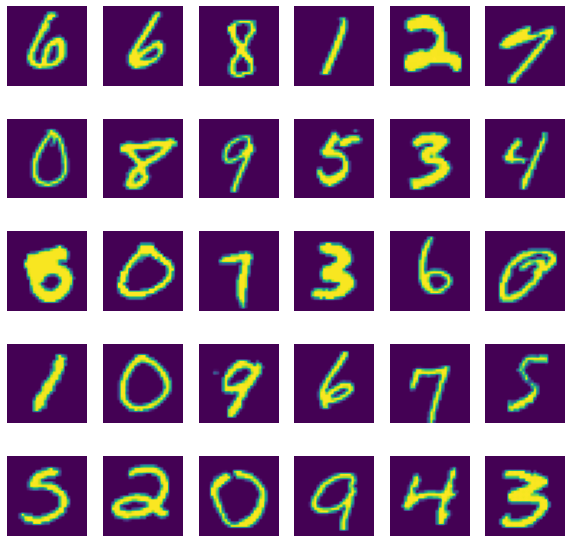

In [14]:
fig, ax = plt.subplots(5,6, figsize=(10,10))

x = stats.uniform.rvs(scale=60000, size=30)
x = x.astype(int)
for axes, j in zip(ax.flatten(), x):
    axes.imshow(x_train[j,:,:])
    axes.set_axis_off()
    axes.set_xlabel(str(ytrain[j]))

In [7]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [33]:
# Build model

model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
hist = model.fit(x_train.reshape(60000,28*28), ytrain, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5836 - accuracy: 0.8993 - val_loss: 1.5300 - val_accuracy: 0.9387
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5234 - accuracy: 0.9440 - val_loss: 1.5141 - val_accuracy: 0.9523
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5091 - accuracy: 0.9563 - val_loss: 1.5071 - val_accuracy: 0.9571
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 1.5003 - accuracy: 0.9650 - val_loss: 1.5034 - val_accuracy: 0.9603
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.4945 - accuracy: 0.9700 - val_loss: 1.4987 - val_accuracy: 0.9645
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.4903 - accuracy: 0.9734 - val_loss: 1.4964 - val_accuracy: 0.9670
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.4869 - accuracy: 0.9766 - val_loss: 1.4949 - val_accuracy:

In [ ]:
x_train.reshape(60000,28*28).shape

(60000, 784)

Text(0, 0.5, 'Loss')

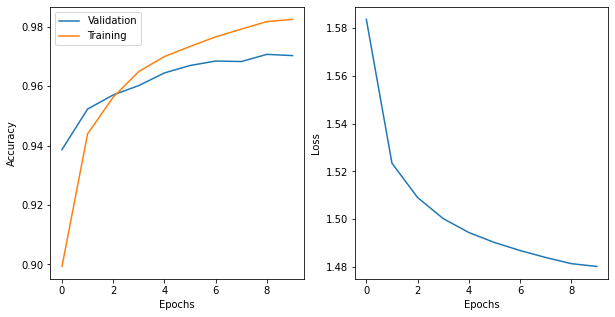

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].plot(hist.history['val_accuracy'], label='Validation')
ax[0].plot(hist.history['accuracy'], label="Training")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(hist.history['loss'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

In [26]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])